# Scientific Tools in Python

## (Part 2)

## 5. Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)

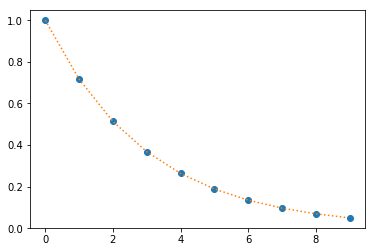

In [10]:
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, ':')
plt.show()

In [26]:
f.__dict__

{'bounds_error': True,
 'copy': True,
 'axis': 0,
 'y': array([1.        , 0.71653131, 0.51341712, 0.36787944, 0.26359714,
        0.1888756 , 0.13533528, 0.09697197, 0.06948345, 0.04978707]),
 '_y': array([[1.        ],
        [0.71653131],
        [0.51341712],
        [0.36787944],
        [0.26359714],
        [0.1888756 ],
        [0.13533528],
        [0.09697197],
        [0.06948345],
        [0.04978707]]),
 'x': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 '_kind': 'linear',
 '_fill_value_below': array([nan]),
 '_fill_value_above': array([nan]),
 '_extrapolate': False,
 '_fill_value_orig': array(nan),
 '_call': <function scipy.interpolate.interpolate.interp1d._call_linear(self, x_new)>}

In [29]:
f.__dict__

{'x': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'y': array([1.        , 0.71653131, 0.51341712, 0.36787944, 0.26359714,
        0.1888756 , 0.13533528, 0.09697197, 0.06948345, 0.04978707])}

In [42]:
m=3
f3 = lambda x, m=m: m*x
m=5
f5 = lambda x, m=m: m*x
print(f3(1), f5(1))

3 5


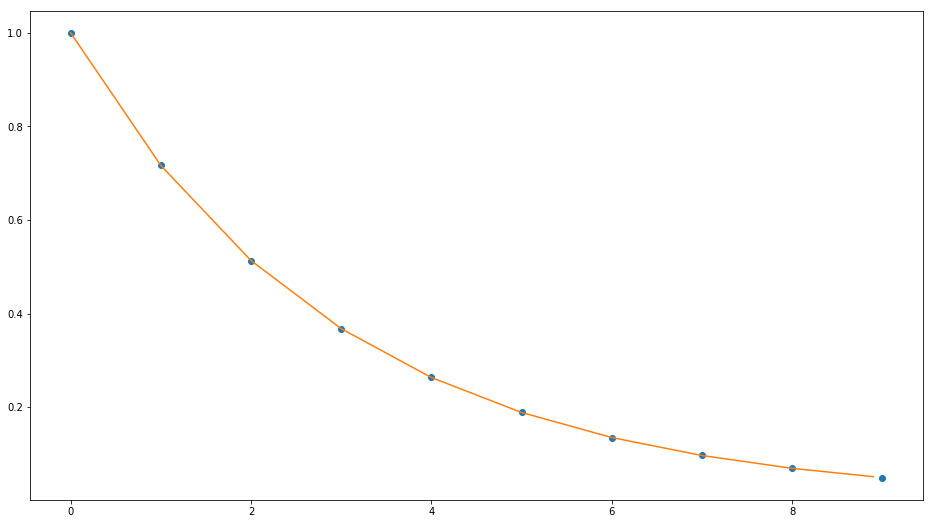

In [43]:
import numpy as np
import matplotlib.pyplot as plt
class myinterp1d(object):
    def __init__(self, x, y):        
        self.x=x
        self.y=y
        self.nInt=len(x)-1  #number of intervals
        self.f=self._linear()
        
    def _linear(self):
        f=[]
        for i in range(self.nInt):
            m=(self.y[i+1]-self.y[i])/(self.x[i+1]-self.x[i])
            b=self.y[i]-m*self.x[i]
            f.append(lambda x, m=m, b=b: m*x+b)
            # m=m, b=b를 추가하면 정상적으로 작동한다. 
        return f            

    def _linear_interp(self, x0):
        if x0<=self.x[0]:
            return y[0]
        elif x0>=self.x[-1]:
            return y[-1]
        else:
            i=next(filter(lambda s: x0<s[1], enumerate(self.x)))[0]
            return self.f[i-1](x0)
    
    def __call__(self, xnew):
        return np.array([self._linear_interp(x0) for x0 in xnew])

x = np.arange(0, 10)
y = np.exp(-x/3.0)    
f = myinterp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [ ]:
f.__dict__

ValueError: x and y must have same first dimension, but have shapes (90,) and (0,)

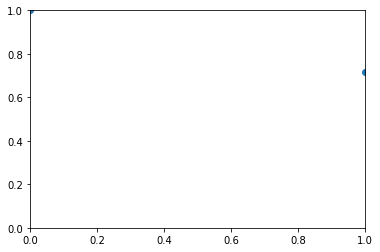

In [12]:
import numpy as np
    
class myinterp1d(object):
    def __init__(self, x, y):        
        self.x=x
        self.y=y
   
    def __call__(self, xnew):
        ynew = []
        for x0 in xnew:
            if x0>self.x[-1]:
                y0=self.y[-1]
            elif x0<=self.x[0]:
                y0=self.y[0]
            else:
                i=next(filter(lambda s:x0<=s[1], enumerate(self.x)))[0]
                m=(self.y[i]-self.y[i-1])/(self.x[i]-self.x[i-1])
                y0=self.y[i-1]+m*(x0-self.x[i-1])
                ynew.append(y0)
            ynew = np.array(ynew)
            return ynew

x = np.arange(0, 10)
y = np.exp(-x/3.0)    
f = myinterp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

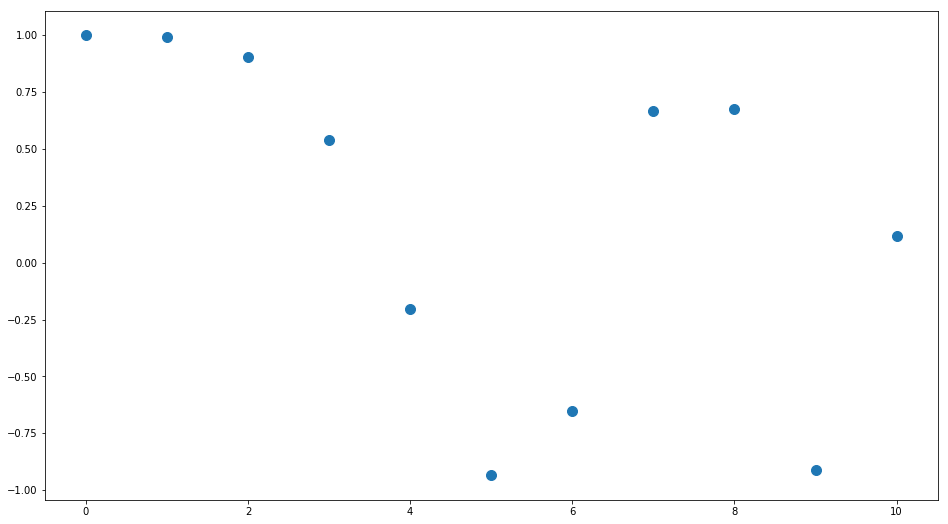

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[16,9]
x=np.linspace(0,10,11)
y=np.cos(-x**2/9.0)
plt.scatter(x,y,s=100)
plt.show()

In [72]:
from scipy.interpolate import interp1d
#Linear interpolation by scipy.interpolate.interp1d
f1=interp1d(x,y,kind='slinear')

#Quadratic spline interpolation by scipy.interpolate.interp1d
f2=interp1d(x,y,kind='quadratic')

#Cubic spline interpolation by scipy.interpolate.interp1d
f3=interp1d(x,y,kind='cubic')

#Curve fitting (quadratic polynomial) by numpy.polyfit
p2=np.polyfit(x,y,2)

#Curve fitting (cubic polynomial) by numpy.polyfit
p3=np.polyfit(x,y,3)

#Curve fitting (polynomial of degree 10) by numpy.polyfit
p10=np.polyfit(x,y,10)

#Local quadratic interpolation
p21=np.polyfit(x[:3], y[:3],2)
p22=np.polyfit(x[1:4], y[1:4],2)

#Local cubic interpolation
p31=np.polyfit(x[:4], y[:4],3)

#Interpolation approximation of fucntion value at x0
x0=1.2
print('f1(x0):', f1(x0))
print('f2(x0):', f2(x0))
print('f3(x0):', f3(x0))
print('p2(x0):', np.polyval(p2,x0))
print('p3(x0):', np.polyval(p3,x0))
print('p10(x0):', np.polyval(p10,x0))
print('p21(x0):', np.polyval(p21,x0))
print('p22(x0):', np.polyval(p22,x0))
print('p31(x0):', np.polyval(p31,x0))

f1(x0): 0.9756367407028933
f2(x0): 0.9857260044901004
f3(x0): 0.9882729795786216
p2(x0): 0.7772520602925175
p3(x0): 0.7603809325418782
p10(x0): 0.966730764501498
p21(x0): 0.9824221285204039
p22(x0): 0.9973618226477539
p31(x0): 0.9883980061713451


(10.0, 0.11527994948463016) (10.0, 0.11527994954575044)


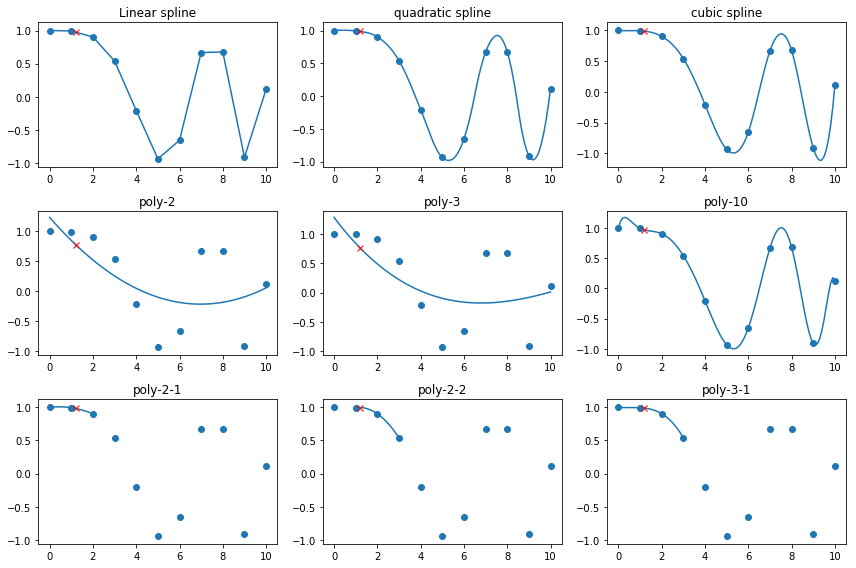

In [61]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[12,8]

fig, ax = plt.subplots(3, 3)

xp=np.linspace(0,10,101)
yp=f1(xp)
ax[0,0].scatter(x, y)
ax[0,0].plot(xp, yp)
ax[0,0].plot(x0, f1(x0), 'rx')
ax[0,0].set_title('Linear spline')


xp=np.linspace(0,10,101)
yp=f2(xp)
ax[0,1].scatter(x, y)
ax[0,1].plot(xp, yp)
ax[0,1].plot(x0, f2(x0), 'rx')
ax[0,1].set_title('quadratic spline')


xp=np.linspace(0,10,101)
yp=f3(xp)
ax[0,2].scatter(x, y)
ax[0,2].plot(xp, yp)
ax[0,2].plot(x0, f3(x0), 'rx')
ax[0,2].set_title('cubic spline')

                  
xp=np.linspace(0,10,101)
yp=np.polyval(p2,xp)
ax[1,0].scatter(x, y)
ax[1,0].plot(xp, yp)
ax[1,0].plot(x0, np.polyval(p2,x0), 'rx')
ax[1,0].set_title('poly-2')

                  
xp=np.linspace(0,10,101)
yp=np.polyval(p3,xp)
ax[1,1].scatter(x, y)
ax[1,1].plot(xp, yp)
ax[1,1].plot(x0, np.polyval(p3,x0), 'rx')
ax[1,1].set_title('poly-3')
                  
xp=np.linspace(0,10,101)
yp=np.polyval(p10,xp)
print((xp[-1],yp[-1]), (x[-1],y[-1]))
ax[1,2].scatter(x, y)
ax[1,2].plot(xp, yp)
ax[1,2].plot(x0, np.polyval(p10,x0), 'rx')
ax[1,2].set_title('poly-10')
                  
xp=np.linspace(0,2,21)
yp=np.polyval(p21,xp)
ax[2,0].scatter(x, y)
ax[2,0].plot(xp, yp)
ax[2,0].plot(x0, np.polyval(p21,x0), 'rx')
ax[2,0].set_title('poly-2-1')
                  
xp=np.linspace(1,3,21)
yp=np.polyval(p22,xp)
ax[2,1].scatter(x, y)
ax[2,1].plot(xp, yp)
ax[2,1].plot(x0, np.polyval(p22,x0), 'rx')
ax[2,1].set_title('poly-2-2')
                  
xp=np.linspace(0,3,31)
yp=np.polyval(p31,xp)
ax[2,2].scatter(x, y)
ax[2,2].plot(xp, yp)
ax[2,2].plot(x0, np.polyval(p31,x0), 'rx')
ax[2,2].set_title('poly-3-1')
                  
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()
plt.show()

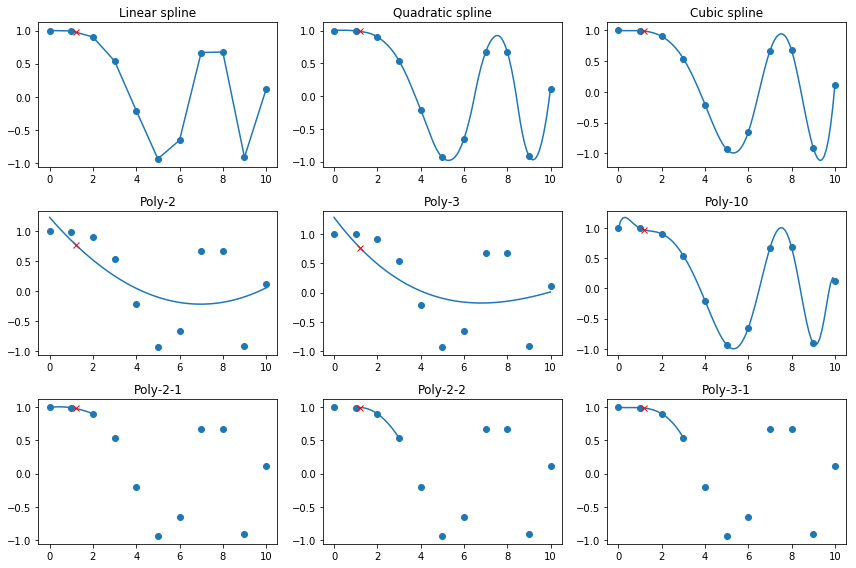

In [81]:
# Use loop
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[12,8]

xp=np.linspace(0,10,101)
xp21=np.linspace(0,2,21)
xp22=np.linspace(1,3,21)
xp31=np.linspace(0,3,31)
xps= [[xp, xp, xp],
      [xp, xp, xp],
      [xp21, xp22, xp31]]

yps= [[f1(xp), f2(xp), f3(xp)],
      [np.polyval(p2,xp), np.polyval(p3,xp), np.polyval(p10,xp)],
      [np.polyval(p21,xp21), np.polyval(p22,xp22), np.polyval(p31,xp31)]]

yp0= [[f1(x0), f2(x0), f3(x0)],
      [np.polyval(p2,x0), np.polyval(p3,x0), np.polyval(p10,x0)],
      [np.polyval(p21,x0), np.polyval(p22,x0), np.polyval(p31,x0)]]

titles= [['Linear spline', 'Quadratic spline', 'Cubic spline',], 
         ['Poly-2', 'Poly-3', 'Poly-10', ],
         ['Poly-2-1', 'Poly-2-2', 'Poly-3-1']]

fig, ax = plt.subplots(3, 3)

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(x, y)
        ax[i,j].plot(xps[i][j], yps[i][j])
        ax[i,j].plot(x0, yp0[i][j], 'rx')
        ax[i,j].set_title(titles[i][j])

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()
plt.show()


In [74]:
print(np.polyval(p21, xp21))

[1.         1.00320013 1.00555209 1.00705587 1.00771149 1.00751892
 1.00647819 1.00458928 1.00185219 0.99826694 0.99383351 0.98855191
 0.98242213 0.97544418 0.96761805 0.95894376 0.94942129 0.93905064
 0.92783183 0.91576483 0.90284967]


In [75]:
np.polyval(p22,xp22)

array([0.99383351, 0.99695548, 0.99736182, 0.99505253, 0.9900276 ,
       0.98228703, 0.97183083, 0.95865899, 0.94277152, 0.92416841,
       0.90284967, 0.87881529, 0.85206528, 0.82259963, 0.79041835,
       0.75552143, 0.71790887, 0.67758068, 0.63453686, 0.5887774 ,
       0.54030231])

In [76]:
np.polyval(p31,xp31)

array([1.        , 0.99787787, 0.99658827, 0.99594448, 0.99575973,
       0.99584729, 0.9960204 , 0.99609233, 0.99587632, 0.99518563,
       0.99383351, 0.99163322, 0.98839801, 0.98394113, 0.97807584,
       0.97061539, 0.96137304, 0.95016204, 0.93679564, 0.9210871 ,
       0.90284967, 0.8818966 , 0.85804116, 0.83109658, 0.80087613,
       0.76719306, 0.72986063, 0.68869208, 0.64350068, 0.59409967,
       0.54030231])